In [5]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

In [12]:
# define State
class BMIState(TypedDict):
    weight_kg: float  # in kilograms
    height_m: float  # in meters
    bmi: float     # Body Mass Index
    category: str

In [3]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)

    return state

In [13]:
def label_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['category'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obesity'
    return state

In [14]:
# define your graph
graph = StateGraph(BMIState)

# add nodes 
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('label_bmi',label_bmi)

# add Edges
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','label_bmi')
graph.add_edge('label_bmi',END)

# compile the graph
workflow = graph.compile()


In [15]:
# execute the graph
initial_state = {'weight_kg':70,'height_m':1.75}
final_state = workflow.invoke(initial_state)

In [16]:
final_state

{'weight_kg': 70, 'height_m': 1.75, 'bmi': 22.86, 'category': 'Normal weight'}

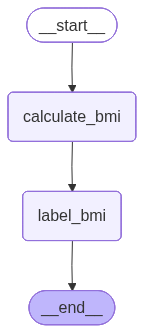

In [17]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())